In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
import seaborn as sns
from plotnine import *


import statsmodels as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import scipy.stats as stats


from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings

warnings.filterwarnings("ignore")

In [60]:
df1 = pd.read_csv("lt-23.csv")
df2 = pd.read_csv("lt-24.csv")

In [61]:
df11 = df1.iloc[::-1].reset_index(drop=True)
df22 = df2.iloc[::-1].reset_index(drop=True)

In [70]:
df22

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,01-Jan-2024,EQ,"3,538.00","3,538.00","3,496.05","3,526.00","3,509.10","3,525.45","3,518.05","3,559.95","2,058.00","7,77,080","2,73,38,04,517.85","99,652"
1,02-Jan-2024,EQ,"3,525.05","3,525.45","3,432.00","3,525.45","3,440.90","3,438.10","3,455.21","3,559.95","2,058.00","15,11,464","5,22,24,23,704.45","1,99,417"
2,03-Jan-2024,EQ,"3,433.00","3,465.85","3,411.60","3,438.10","3,440.00","3,440.35","3,438.35","3,559.95","2,058.00","12,83,859","4,41,43,62,339.55","1,47,403"
3,04-Jan-2024,EQ,"3,441.05","3,480.10","3,423.00","3,440.35","3,459.95","3,458.70","3,457.46","3,559.95","2,058.00","16,51,616","5,71,04,00,919.60","1,55,242"
4,05-Jan-2024,EQ,"3,464.95","3,555.00","3,460.00","3,458.70","3,548.60","3,521.90","3,497.02","3,559.95","2,058.00","20,69,018","7,23,53,90,724.65","2,11,563"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,24-Dec-2024,EQ,"3,647.95","3,679.00","3,632.40","3,640.50","3,633.00","3,639.75","3,651.50","3,963.50","3,175.05","6,27,922","2,29,28,60,072.10","71,920"
245,26-Dec-2024,EQ,"3,658.00","3,665.15","3,610.35","3,639.75","3,632.40","3,629.50","3,634.04","3,963.50","3,175.05","11,24,705","4,08,72,19,624.30","80,516"
246,27-Dec-2024,EQ,"3,632.40","3,643.65","3,603.50","3,629.50","3,610.65","3,608.10","3,617.13","3,963.50","3,175.05","13,09,122","4,73,52,58,789.05","75,927"
247,30-Dec-2024,EQ,"3,607.90","3,623.00","3,566.00","3,608.10","3,590.00","3,578.95","3,590.43","3,963.50","3,175.05","15,91,690","5,71,48,56,382.30","99,927"


In [67]:
lt = pd.read_csv("LT 2023-24.csv")

In [68]:
lt

,Unnamed: 0,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,0,02-Jan-2023,EQ,"2,092.90","2,097.60","2,075.05","2,085.80","2,092.05","2,089.45","2,089.10","2,211.60","1,456.35","8,07,344","1,68,66,20,365.65","63,597"
1,1,03-Jan-2023,EQ,"2,088.00","2,096.80","2,067.95","2,089.45","2,090.95","2,088.95","2,082.34","2,211.60","1,456.35","12,60,225","2,62,42,18,252.15","62,640"
2,2,04-Jan-2023,EQ,"2,090.95","2,101.45","2,058.00","2,088.95","2,069.00","2,070.55","2,070.22","2,211.60","1,456.35","10,15,547","2,10,24,06,151.60","62,520"
3,3,05-Jan-2023,EQ,"2,080.00","2,099.20","2,068.50","2,070.55","2,089.50","2,087.35","2,080.70","2,211.60","1,456.35","18,81,403","3,91,46,41,790.65","95,733"
4,4,06-Jan-2023,EQ,"2,090.20","2,121.70","2,071.85","2,087.35","2,088.00","2,086.55","2,093.65","2,211.60","1,456.35","18,77,917","3,93,16,94,802.65","95,076"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,244,24-Dec-2024,EQ,"3,647.95","3,679.00","3,632.40","3,640.50","3,633.00","3,639.75","3,651.50","3,963.50","3,175.05","6,27,922","2,29,28,60,072.10","71,920"
491,245,26-Dec-2024,EQ,"3,658.00","3,665.15","3,610.35","3,639.75","3,632.40","3,629.50","3,634.04","3,963.50","3,175.05","11,24,705","4,08,72,19,624.30","80,516"
492,246,27-Dec-2024,EQ,"3,632.40","3,643.65","3,603.50","3,629.50","3,610.65","3,608.10","3,617.13","3,963.50","3,175.05","13,09,122","4,73,52,58,789.05","75,927"
493,247,30-Dec-2024,EQ,"3,607.90","3,623.00","3,566.00","3,608.10","3,590.00","3,578.95","3,590.43","3,963.50","3,175.05","15,91,690","5,71,48,56,382.30","99,927"


In [52]:
# tcs.drop(["Unnamed: 0"], axis=1, inplace = True)

In [44]:
# rel

In [63]:
# tcs

In [53]:
# tcs.to_csv("TCS 2023-24.csv")

In [58]:
# final_data = pd.read_csv("Rel 2023-24.csv")

In [59]:
# final_data

,Unnamed: 0,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,0,02-Jan-2023,EQ,"2,550.00","2,579.00","2,548.20","2,547.20","2,577.90","2,575.90","2,564.68","2,856.15","2,180.00","24,53,414","6,29,22,10,762.05","97,175"
1,1,03-Jan-2023,EQ,"2,565.05","2,573.00","2,547.80","2,575.90","2,555.80","2,557.05","2,558.48","2,856.15","2,180.00","35,34,596","9,04,31,99,290.70","1,35,268"
2,2,04-Jan-2023,EQ,"2,557.00","2,561.05","2,514.00","2,557.05","2,516.65","2,518.55","2,529.71","2,856.15","2,180.00","42,75,746","10,81,63,99,502.15","1,82,754"
3,3,05-Jan-2023,EQ,"2,523.50","2,536.40","2,504.00","2,518.55","2,521.80","2,514.05","2,516.50","2,856.15","2,180.00","62,93,519","15,83,76,39,744.30","1,97,434"
4,4,06-Jan-2023,EQ,"2,526.65","2,547.95","2,518.30","2,514.05","2,537.00","2,536.90","2,534.90","2,856.15","2,180.00","29,30,338","7,42,81,25,091.15","1,57,118"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,490,24-Dec-2024,EQ,"1,222.30","1,233.55","1,221.00","1,222.30","1,224.20","1,222.75","1,227.14","3,217.60","1,201.50","67,34,917","8,26,46,75,853.25","2,07,746"
491,491,26-Dec-2024,EQ,"1,224.25","1,227.70","1,214.25","1,222.75","1,217.00","1,216.55","1,219.74","3,217.60","1,201.50","1,00,16,178","12,21,71,76,986.80","2,56,436"
492,492,27-Dec-2024,EQ,"1,218.30","1,227.90","1,217.00","1,216.55","1,221.50","1,221.05","1,223.20","3,217.60","1,201.50","70,00,397","8,56,28,95,530.20","1,74,882"
493,493,30-Dec-2024,EQ,"1,216.40","1,223.20","1,208.10","1,221.05","1,211.50","1,210.70","1,214.71","3,217.60","1,201.50","88,18,766","10,71,22,29,377.50","3,08,317"


In [46]:
# rel.columns

In [64]:
df = pd.concat([df11,df22],axis=0)

In [65]:
df.head()

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,02-Jan-2023,EQ,"2,092.90","2,097.60","2,075.05","2,085.80","2,092.05","2,089.45","2,089.10","2,211.60","1,456.35","8,07,344","1,68,66,20,365.65","63,597"
1,03-Jan-2023,EQ,"2,088.00","2,096.80","2,067.95","2,089.45","2,090.95","2,088.95","2,082.34","2,211.60","1,456.35","12,60,225","2,62,42,18,252.15","62,640"
2,04-Jan-2023,EQ,"2,090.95","2,101.45","2,058.00","2,088.95","2,069.00","2,070.55","2,070.22","2,211.60","1,456.35","10,15,547","2,10,24,06,151.60","62,520"
3,05-Jan-2023,EQ,"2,080.00","2,099.20","2,068.50","2,070.55","2,089.50","2,087.35","2,080.70","2,211.60","1,456.35","18,81,403","3,91,46,41,790.65","95,733"
4,06-Jan-2023,EQ,"2,090.20","2,121.70","2,071.85","2,087.35","2,088.00","2,086.55","2,093.65","2,211.60","1,456.35","18,77,917","3,93,16,94,802.65","95,076"


In [66]:
df.to_csv("LT 2023-24.csv")

In [8]:
df = df[['Date ', 'OPEN ', 'HIGH ', 'LOW ',"close ","VOLUME "]]
df.columns = ['Date', 'Open', 'High', 'Low',"Close","Volume"]

In [9]:
df

,Date,Open,High,Low,Close,Volume
0,02-Jan-2023,"2,550.00","2,579.00","2,548.20","2,575.90","24,53,414"
1,03-Jan-2023,"2,565.05","2,573.00","2,547.80","2,557.05","35,34,596"
2,04-Jan-2023,"2,557.00","2,561.05","2,514.00","2,518.55","42,75,746"
3,05-Jan-2023,"2,523.50","2,536.40","2,504.00","2,514.05","62,93,519"
4,06-Jan-2023,"2,526.65","2,547.95","2,518.30","2,536.90","29,30,338"
...,...,...,...,...,...,...
244,24-Dec-2024,"1,222.30","1,233.55","1,221.00","1,222.75","67,34,917"
245,26-Dec-2024,"1,224.25","1,227.70","1,214.25","1,216.55","1,00,16,178"
246,27-Dec-2024,"1,218.30","1,227.90","1,217.00","1,221.05","70,00,397"
247,30-Dec-2024,"1,216.40","1,223.20","1,208.10","1,210.70","88,18,766"


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 495 entries, 0 to 248
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    495 non-null    object
 1   Open    495 non-null    object
 2   High    495 non-null    object
 3   Low     495 non-null    object
 4   Close   495 non-null    object
 5   Volume  495 non-null    object
dtypes: object(6)
memory usage: 27.1+ KB


In [11]:
df["Date"]=pd.to_datetime(df['Date'])

In [12]:
df.set_index("Date",inplace=True)

In [13]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2024-12-24,"1,296.80","1,304.50","1,290.25","1,297.25","71,38,516"
2024-12-26,"1,307.00","1,312.75","1,289.20","1,297.35","73,38,444"
2024-12-27,"1,298.55","1,315.95","1,298.55","1,307.55","47,56,066"
2024-12-30,"1,304.95","1,326.50","1,289.45","1,294.65","1,42,07,425"
2024-12-31,"1,286.90","1,289.95","1,280.10","1,281.65","84,49,607"


In [14]:
df[df.isnull().any(axis=1)]

,Open,High,Low,Close,Volume
Date,,,,,


In [15]:
df[["Open", "High", "Low", "Close", "Volume"]] = (
    df[["Open", "High", "Low", "Close", "Volume"]]
    .replace({",": ""}, regex=True)  # Remove commas
    .apply(pd.to_numeric, errors="coerce")  # Convert to numeric
)

In [16]:
df[["Close","Open"]].describe(percentiles = [0.1,0.25,0.5,0.75,0.9,0.99,1])

,Close,Open
count,495.000000,495.000000
mean,1048.548485,1048.292929
std,145.128978,144.348202
min,817.200000,800.000000
10%,869.740000,873.380000
25%,937.975000,939.775000
50%,1002.250000,1002.550000
75%,1172.525000,1174.600000
90%,1266.300000,1262.000000
99%,1331.964000,1325.689000


In [17]:
df.Close

Date
2023-01-02     902.45
2023-01-03     901.35
2023-01-04     899.10
2023-01-05     879.15
2023-01-06     870.10
               ...   
2024-12-24    1297.25
2024-12-26    1297.35
2024-12-27    1307.55
2024-12-30    1294.65
2024-12-31    1281.65
Name: Close, Length: 495, dtype: float64

In [18]:
print("Skewness of closing price:",stats.skew(df.Close))
print("Skewness of opening price:",stats.skew(df.Open))
print("Kurtosis of closing price:",stats.kurtosis(df.Close))
print("Kurtosis of opening price:",stats.kurtosis(df.Open))

Skewness of closing price: 0.43614273089651556
Skewness of opening price: 0.43389173860999225
Kurtosis of closing price: -1.0637450936744766
Kurtosis of opening price: -1.067432008308999


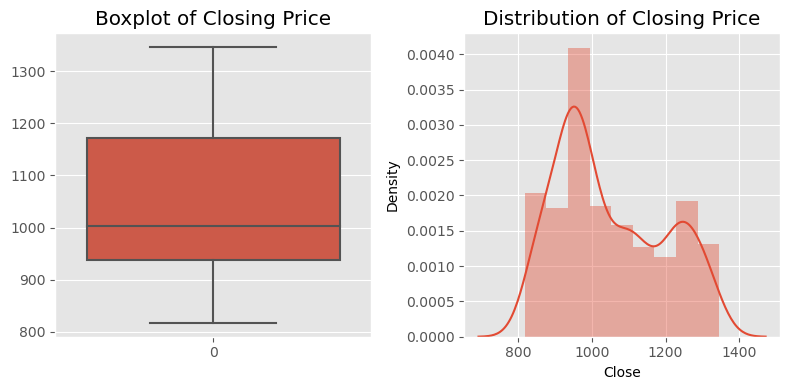

In [19]:
plt.figure(figsize = (8,4))
plt.subplot(1,2,1)
plt.title("Boxplot of Closing Price")
sns.boxplot(df.Close)
plt.subplot(1,2,2)
sns.distplot(df.Close)
plt.title("Distribution of Closing Price")
plt.tight_layout()
plt.show()

#### There is no outlier

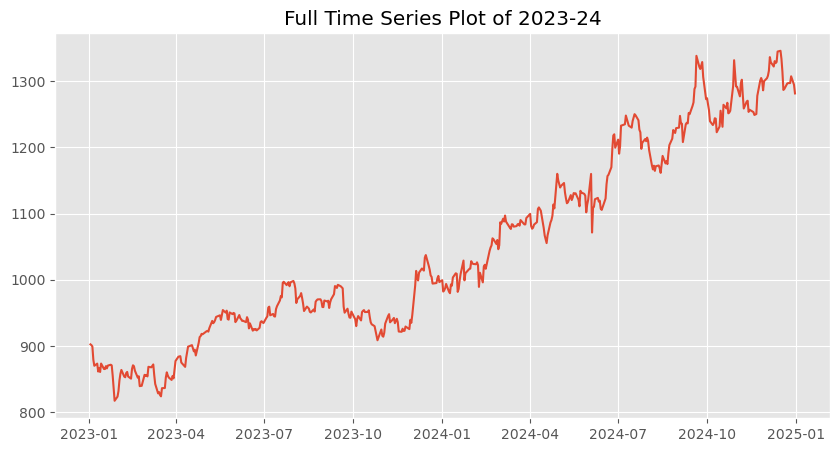

In [20]:
plt.figure(figsize=(10,5))
plt.plot(df.Close)
plt.title("Full Time Series Plot of 2023-24")
plt.show()

#### Clearly there is an upward trend and its a non-stationary series 

### Yearly Series

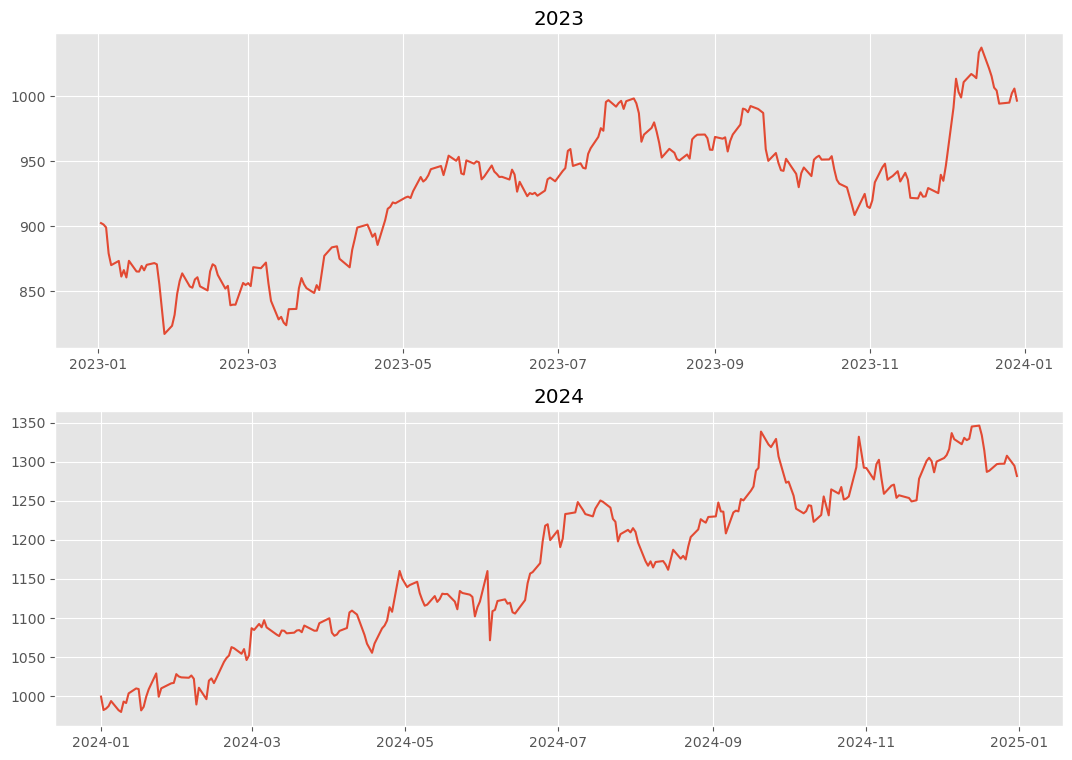

In [21]:
fig,axes=plt.subplots(nrows=2,ncols=1,figsize=(13,9))
axes=axes.ravel()
axes[0].plot(df.Close[:246])
axes[0].set_title("2023")
axes[1].plot(df.Close[246:])
axes[1].set_title("2024")
plt.show()

#### • For 2023, overall there is an upward trend with some dips
#### • For 2024, we can clearly see an upward trend with some cyclic components

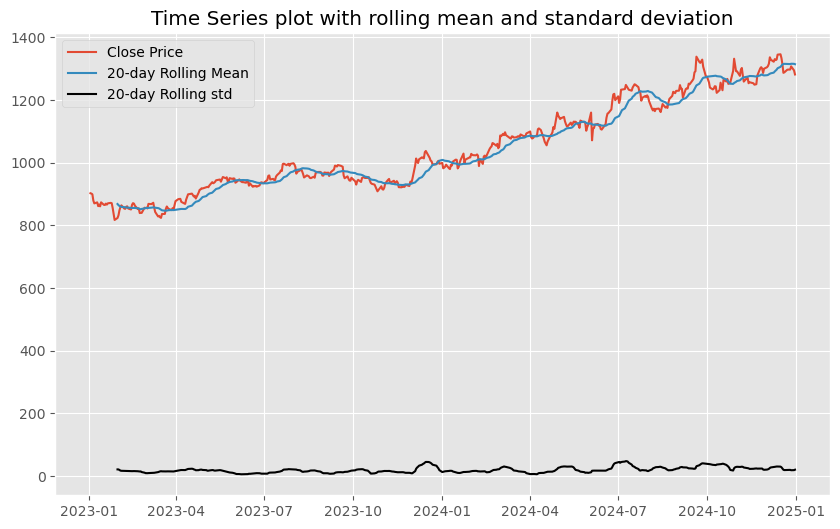

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['Close'].rolling(window=20).mean(), label='20-day Rolling Mean')
plt.plot(df['Close'].rolling(window=20).std(), label='20-day Rolling std',color="black")
plt.title("Time Series plot with rolling mean and standard deviation")
plt.legend()
plt.show()

## Seasonal Decomposition

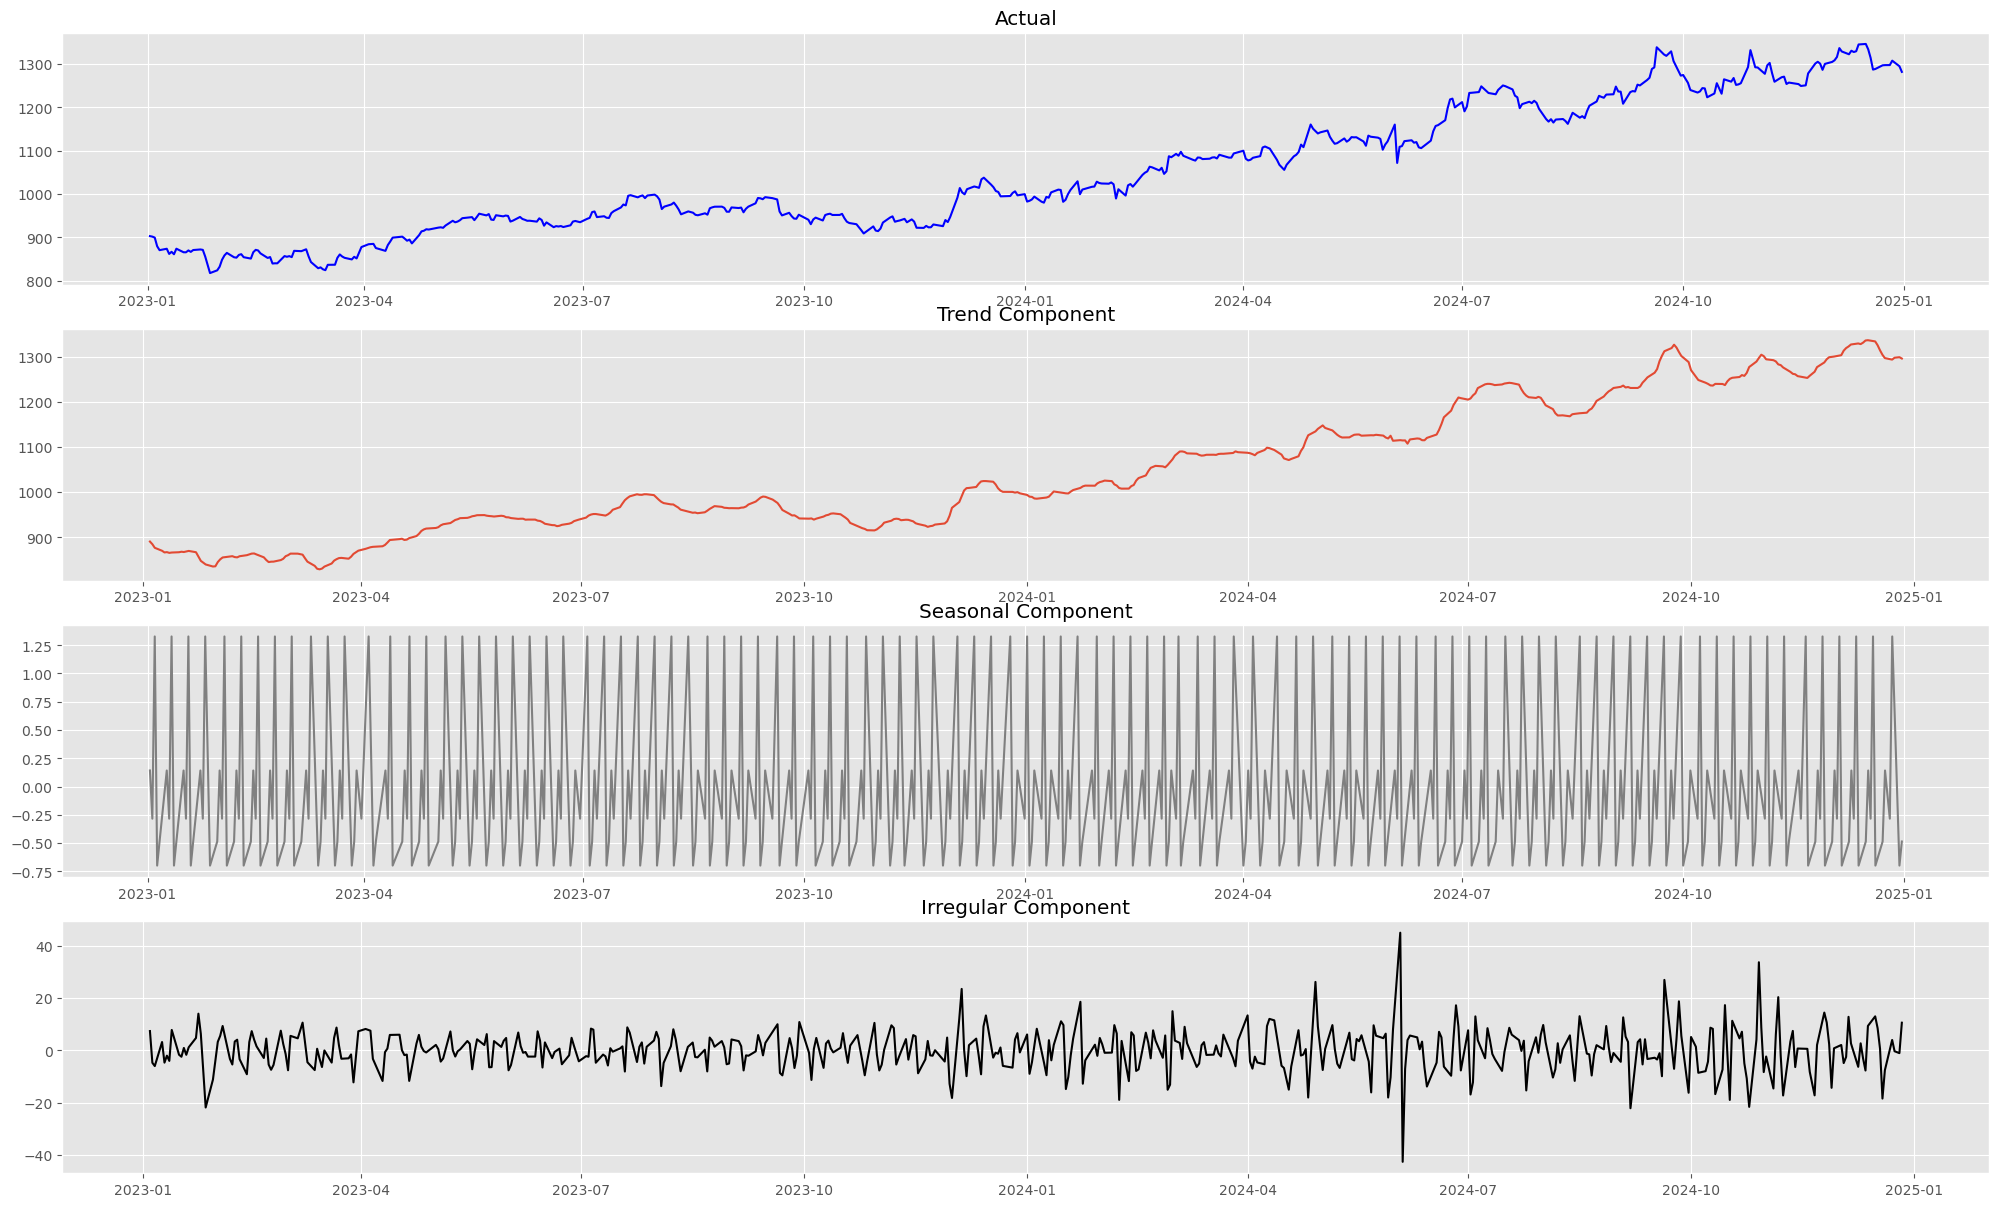

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
dec=seasonal_decompose(df["Close"],model="additive",period = 5)
fig,axes=plt.subplots(4,1,figsize=(20,12))
plt.tight_layout()
axes[0].plot(dec.observed,color='blue')
axes[0].set_title("Actual")
axes[1].plot(dec.trend)
axes[1].set_title("Trend Component")
axes[2].plot(dec.seasonal,color='grey')
axes[2].set_title("Seasonal Component")
axes[3].plot(dec.resid,color='black')
axes[3].set_title("Irregular Component")
plt.show()

#### • We can clearly see upward trend
#### • The seasonal component appears regular with a consistent pattern over the years

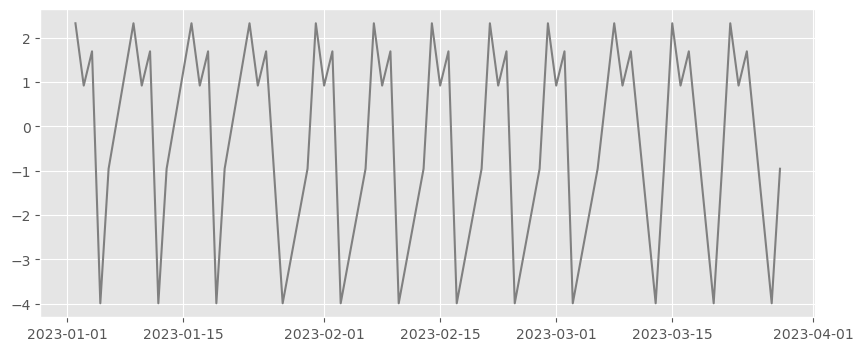

In [26]:
plt.figure(figsize = (10,4))
dec=seasonal_decompose(df["Close"][:60],model="additive",period = 5)
plt.plot(dec.seasonal,color='grey')

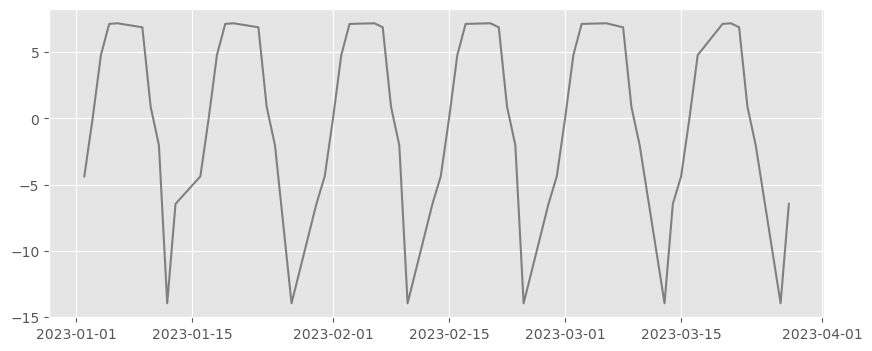

In [27]:
plt.figure(figsize = (10,4))
dec=seasonal_decompose(df["Close"][:60],model="additive",period = 10)
plt.plot(dec.seasonal,color='grey')

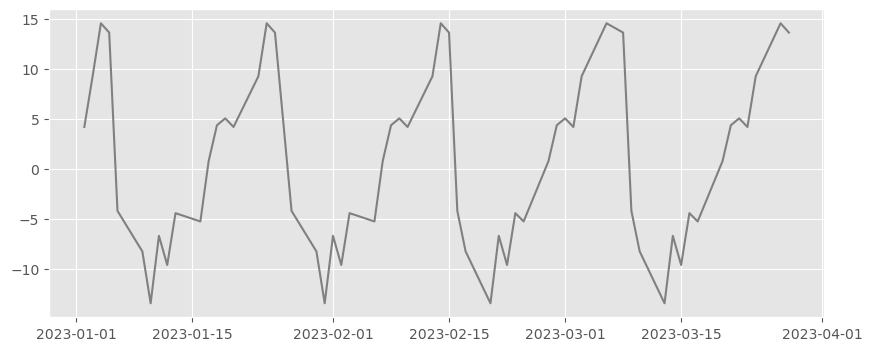

In [29]:
plt.figure(figsize = (10,4))
dec=seasonal_decompose(df["Close"][:60],model="additive",period = 14)
plt.plot(dec.seasonal,color='grey')

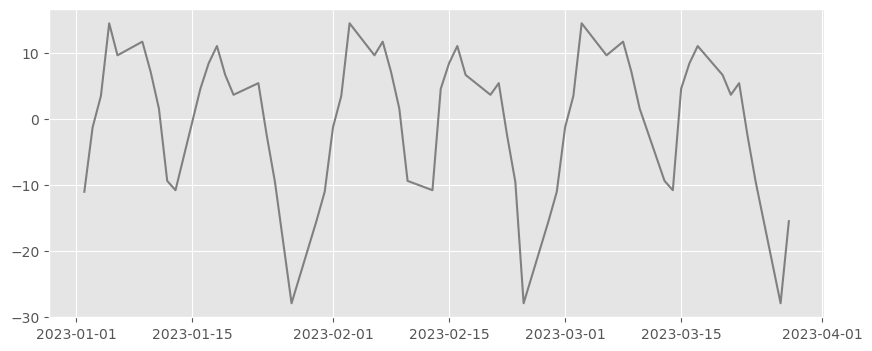

In [119]:
plt.figure(figsize = (10,4))
dec=seasonal_decompose(df["Close"][:60],model="additive",period = 20)
plt.plot(dec.seasonal,color='grey')

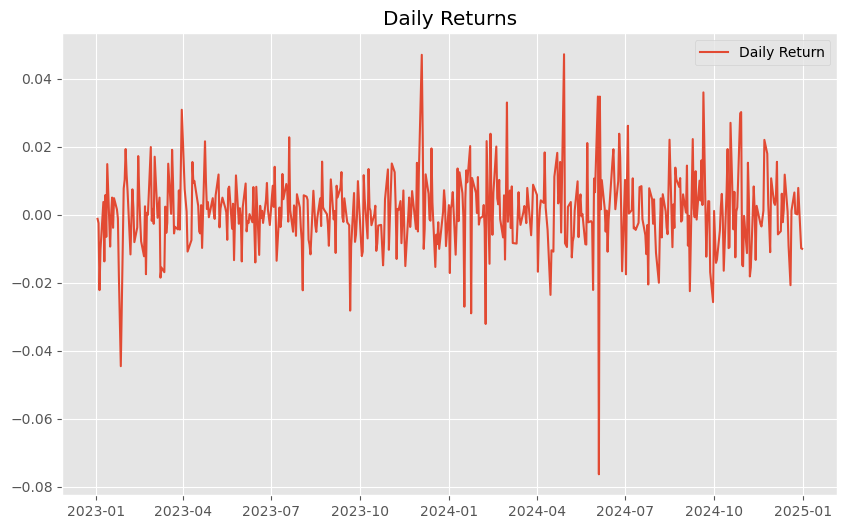

In [30]:
df['daily_return'] = df['Close'].pct_change()
plt.figure(figsize=(10, 6))
plt.plot(df['daily_return'], label='Daily Return')
plt.title('Daily Returns')
plt.legend()
plt.show()

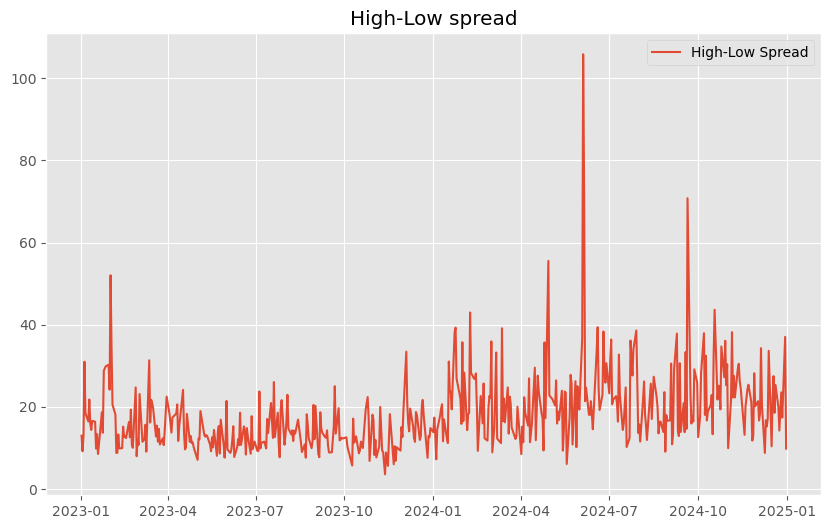

In [31]:
df['high_low_spread'] = df['High'] - df['Low']
plt.figure(figsize=(10, 6))
plt.plot(df['high_low_spread'], label='High-Low Spread')
plt.title("High-Low spread")
plt.legend()
plt.show()

## ADF Test

In [33]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df['Close'])
print('ADF Statistic: {:.6f}\np-value: {:.6f}\n#Lags used: {}'
      .format(adf_test[0], adf_test[1], adf_test[2]))
for key, value in adf_test[4].items():
    print('Critical Value ({}): {:.6f}'.format(key, value))

ADF Statistic: -0.537585
p-value: 0.884471
#Lags used: 0
Critical Value (1%): -3.443657
Critical Value (5%): -2.867408
Critical Value (10%): -2.569896


* high p-value, it suggests reject null hypothesis so, not stationary

## ACF and PACF

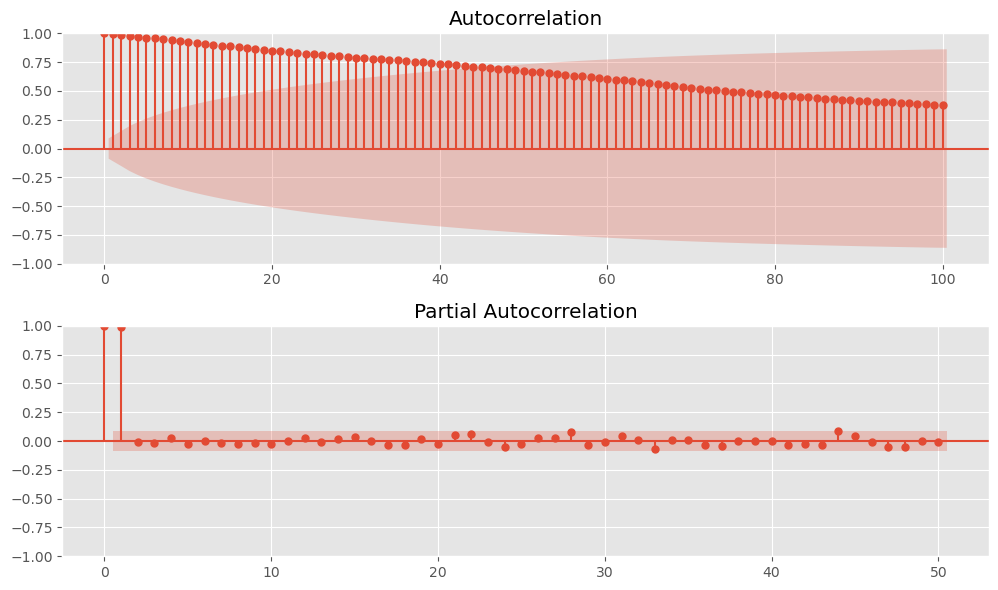

In [34]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 6))
plot_acf(df["Close"], lags=100, ax=ax1)
plot_pacf(df["Close"], lags=50, ax=ax2)
plt.tight_layout()
plt.show()

## Prophet Model

In [40]:
pip install pystan

Note: you may need to restart the kernel to use updated packages.


In [41]:
pip install prophet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 4.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 4.5 MB/s eta 0:00:00
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
Note: you may need to restart the kernel to use updated packages.


In [42]:
import prophet

In [43]:
from prophet import Prophet

In [46]:
data=df.Close[:470]
data = pd.DataFrame(data)
data["ds"] = data.index
data.columns  =["y","ds"]
data.reset_index(inplace = True)
data.drop("Date",inplace=True,axis = 1)

In [47]:
data.head()

,y,ds
0,902.45,2023-01-02
1,901.35,2023-01-03
2,899.10,2023-01-04
3,879.15,2023-01-05
4,870.10,2023-01-06


In [48]:
data.tail()

,y,ds
465,1253.45,2024-11-18
466,1249.10,2024-11-19
467,1250.55,2024-11-21
468,1278.05,2024-11-22
469,1300.95,2024-11-25


In [50]:
model = Prophet(daily_seasonality=True)  # You can set seasonalities like weekly, yearly, etc.
model.fit(data)
future = model.make_future_dataframe(periods=25)
forecast  = model.predict(future)

21:13:01 - cmdstanpy - INFO - Chain [1] start processing
21:13:01 - cmdstanpy - INFO - Chain [1] done processing


* Now check for the results

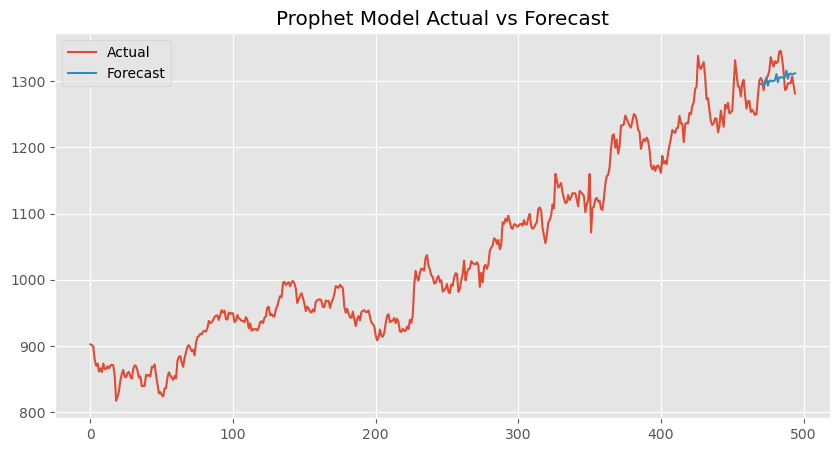

In [52]:
plt.figure(figsize = (10,5))
plt.plot(df.Close.reset_index(drop = True), label = 'Actual')
plt.plot(forecast.yhat[470:], label = "Forecast")
plt.title("Prophet Model Actual vs Forecast")
plt.legend()
plt.show()

In [56]:
mae = mean_absolute_error(df.Close[470:], forecast.yhat[470:])
print("Mean Absolute Error:",mae)

mse = mean_squared_error(df.Close[470:], forecast.yhat[470:])
rmse = np.sqrt(mse)
print("Root Mean Absolute Error:",rmse)



mape = np.mean(np.abs((np.array(forecast.yhat[470:]) - np.array(df.Close[470:])) / df.Close[470:])) * 100
print("Mean Absolute Percentage Error:",mape)

Mean Absolute Error: 18.759221526128723
Root Mean Absolute Error: 21.971885521387463
Mean Absolute Percentage Error: 1.4235712755666576


## Using Optuna

In [57]:
pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 5.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 5.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 6.6 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.9.0
    Uninstalling typing_extensions-4.9.0:
      Successfully uninstalled typing_extensions-4.9.0
Note: you may need to restart the kernel to use updated packages.


In [59]:
import optuna

def objective(trial):
    changepoint_prior_scale = trial.suggest_loguniform("changepoint_prior_scale", 0.01, 4)
    seasonality_prior_scale = trial.suggest_loguniform("seasonality_prior_scale", 0.01, 20)
    holidays_prior_scale = trial.suggest_loguniform("holidays_prior_scale", 0.01, 10)
    yearly_seasonality  = trial.suggest_loguniform("yearly_seasonality", 2,20)
    n_changepoints = trial.suggest_uniform("n_changepoints", 1,20)
    seasonality_mode = trial.suggest_categorical("seasonality_mode", ["additive", "multiplicative"])

    model = Prophet(
        changepoint_prior_scale=changepoint_prior_scale,
        seasonality_prior_scale=seasonality_prior_scale,
        holidays_prior_scale=holidays_prior_scale,
        
        yearly_seasonality = yearly_seasonality,
        seasonality_mode=seasonality_mode
    )

    
    model.fit(data)

    future = model.make_future_dataframe(periods=25)
    forecast = model.predict(future)

    y_true = df.Close[470:].values  
    y_pred = forecast["yhat"][470:].values 
    return mean_absolute_error(y_true, y_pred)


study = optuna.create_study(direction="minimize")  
study.optimize(objective, n_trials=50) 

print(study.best_params)


[I 2025-03-11 21:19:39,601] A new study created in memory with name: no-name-8d707651-e6b5-4167-9293-100270868b79
21:19:39 - cmdstanpy - INFO - Chain [1] start processing
21:19:39 - cmdstanpy - INFO - Chain [1] done processing
[I 2025-03-11 21:19:39,867] Trial 0 finished with value: 69.39509602839739 and parameters: {'changepoint_prior_scale': 1.4159068171422249, 'seasonality_prior_scale': 3.2851261149338, 'holidays_prior_scale': 5.230859244521264, 'yearly_seasonality': 2.380250894674355, 'n_changepoints': 2.8407401157142207, 'seasonality_mode': 'additive'}. Best is trial 0 with value: 69.39509602839739.
21:19:39 - cmdstanpy - INFO - Chain [1] start processing
21:19:39 - cmdstanpy - INFO - Chain [1] done processing
[I 2025-03-11 21:19:40,052] Trial 1 finished with value: 56.07631125513876 and parameters: {'changepoint_prior_scale': 0.03357994366200343, 'seasonality_prior_scale': 0.017488077913833854, 'holidays_prior_scale': 4.770880289333979, 'yearly_seasonality': 12.636601062089248, '

{'changepoint_prior_scale': 1.3748425948684737, 'seasonality_prior_scale': 0.04813422497742188, 'holidays_prior_scale': 0.013268965433603515, 'yearly_seasonality': 16.45742482007618, 'n_changepoints': 7.893487663146516, 'seasonality_mode': 'additive'}


### With hyperparas got using Axis bank data

21:21:42 - cmdstanpy - INFO - Chain [1] start processing
21:21:43 - cmdstanpy - INFO - Chain [1] done processing


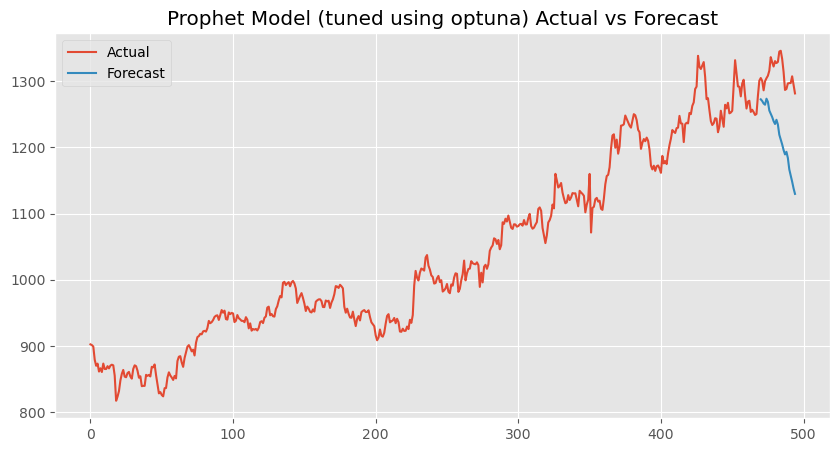

In [60]:
model = Prophet(changepoint_prior_scale = 0.70, seasonality_prior_scale =  2.611, holidays_prior_scale = 6.6, 
                seasonality_mode = "multiplicative", yearly_seasonality = 5.74)
model.fit(data)

future = model.make_future_dataframe(periods=25)


forecast  = model.predict(future)



plt.figure(figsize = (10,5))
plt.plot(df.Close.reset_index(drop = True), label = 'Actual')
plt.plot(forecast.yhat[470:], label = "Forecast")
plt.title("Prophet Model (tuned using optuna) Actual vs Forecast")

plt.legend()
plt.show()

## Hyperparameter suggested by Optuna

21:44:57 - cmdstanpy - INFO - Chain [1] start processing
21:44:57 - cmdstanpy - INFO - Chain [1] done processing


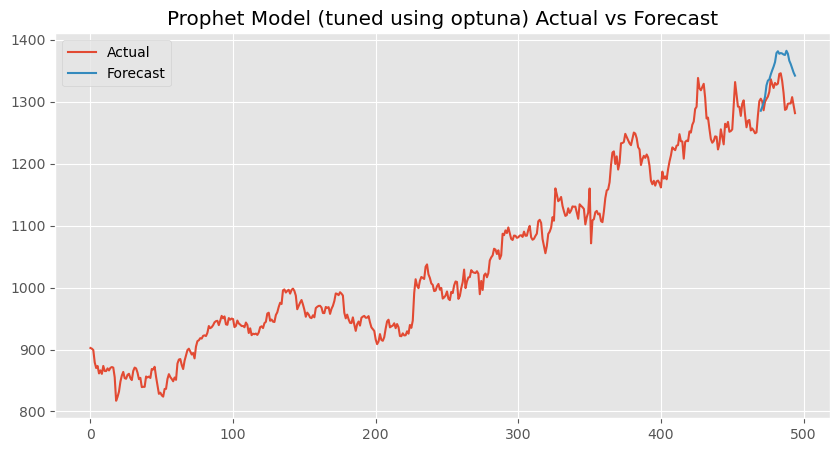

In [74]:
model = Prophet(changepoint_prior_scale = 1.4, n_changepoints = 8, yearly_seasonality = 16.4574, seasonality_prior_scale =  0.0481, holidays_prior_scale = 0.0133, )
model.fit(data)

future = model.make_future_dataframe(periods=25)

forecast  = model.predict(future)

plt.figure(figsize = (10,5))
plt.plot(df.Close.reset_index(drop = True), label = 'Actual')
plt.plot(forecast.yhat[470:], label = "Forecast")
plt.title("Prophet Model (tuned using optuna) Actual vs Forecast")

plt.legend()
plt.show()

22:14:15 - cmdstanpy - INFO - Chain [1] start processing
22:14:16 - cmdstanpy - INFO - Chain [1] done processing


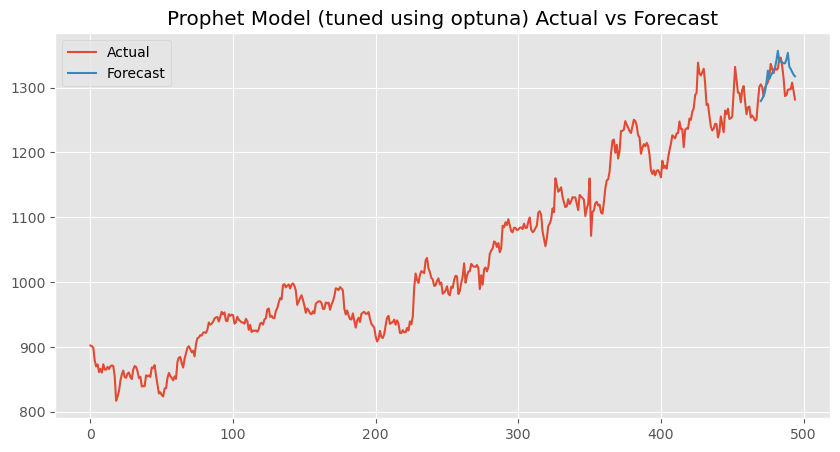

Mean Absolute Error: 19.63607462354049
Root Mean Absolute Error: 25.71485977984715
Mean Absolute Percentage Error: 1.5079369114861576


In [115]:
model = Prophet(changepoint_prior_scale = 1.4, n_changepoints = 7, yearly_seasonality = 16, seasonality_prior_scale =  0.04, holidays_prior_scale = 0.01)
model.fit(data)

future = model.make_future_dataframe(periods=25)

forecast  = model.predict(future)

plt.figure(figsize = (10,5))
plt.plot(df.Close.reset_index(drop = True), label = 'Actual')
plt.plot(forecast.yhat[470:], label = "Forecast")
plt.title("Prophet Model (tuned using optuna) Actual vs Forecast")

plt.legend()
plt.show()

mae = mean_absolute_error(df.Close[470:], forecast.yhat[470:])
print("Mean Absolute Error:",mae)

mse = mean_squared_error(df.Close[470:], forecast.yhat[470:])
rmse = np.sqrt(mse)
print("Root Mean Absolute Error:",rmse)



mape = np.mean(np.abs((np.array(forecast.yhat[470:]) - np.array(df.Close[470:])) / df.Close[470:])) * 100
print("Mean Absolute Percentage Error:",mape)

23:54:44 - cmdstanpy - INFO - Chain [1] start processing
23:54:44 - cmdstanpy - INFO - Chain [1] done processing


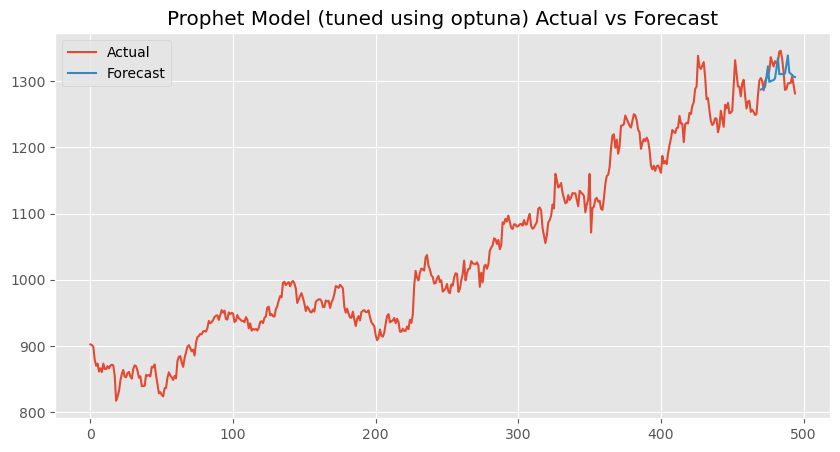

Mean Absolute Error: 18.672012361450587
Root Mean Absolute Error: 22.089632319118962
Mean Absolute Percentage Error: 1.4209285408754393


In [122]:
model = Prophet(changepoint_prior_scale = 0.7, n_changepoints = 7, yearly_seasonality = 8, holidays_prior_scale = 0.01)
model.fit(data)

future = model.make_future_dataframe(periods=25)

forecast  = model.predict(future)

plt.figure(figsize = (10,5))
plt.plot(df.Close.reset_index(drop = True), label = 'Actual')
plt.plot(forecast.yhat[470:], label = "Forecast")
plt.title("Prophet Model (tuned using optuna) Actual vs Forecast")

plt.legend()
plt.show()

mae = mean_absolute_error(df.Close[470:], forecast.yhat[470:])
print("Mean Absolute Error:",mae)

mse = mean_squared_error(df.Close[470:], forecast.yhat[470:])
rmse = np.sqrt(mse)
print("Root Mean Absolute Error:",rmse)



mape = np.mean(np.abs((np.array(forecast.yhat[470:]) - np.array(df.Close[470:])) / df.Close[470:])) * 100
print("Mean Absolute Percentage Error:",mape)

In [123]:
mae = mean_absolute_error(df.Close[470:], forecast.yhat[470:])
print("Mean Absolute Error:", mae)

mse = mean_squared_error(df.Close[470:], forecast.yhat[470:])
rmse = np.sqrt(mse)
print("Root Mean Absolute Error:",rmse)

mape = np.mean(np.abs((np.array(forecast.yhat[470:]) - np.array(df.Close[470:])) / df.Close[470:])) * 100
print("Mean Absolute Percentage Error:",mape)

Mean Absolute Error: 18.672012361450587
Root Mean Absolute Error: 22.089632319118962
Mean Absolute Percentage Error: 1.4209285408754393


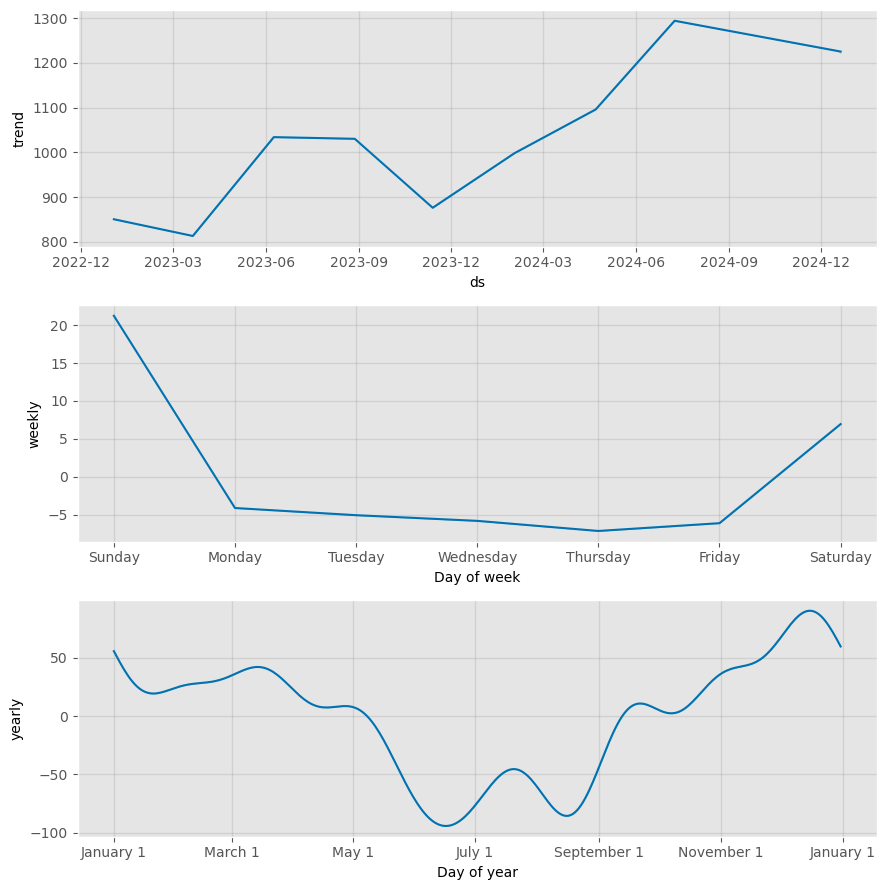

In [124]:
model.plot_components(forecast)
plt.show()

## Experimenting with classical time series models

###  ARIMA Model

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  470
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1849.236
Date:                Wed, 12 Mar 2025   AIC                           3702.471
Time:                        03:16:48   BIC                           3710.773
Sample:                             0   HQIC                          3705.738
                                - 470                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0463      0.030     -1.551      0.121      -0.105       0.012
sigma2       155.7079      5.438     28.635      0.000     145.050     166.365
Ljung-Box (L1) (Q):                   0.02   Jarque-

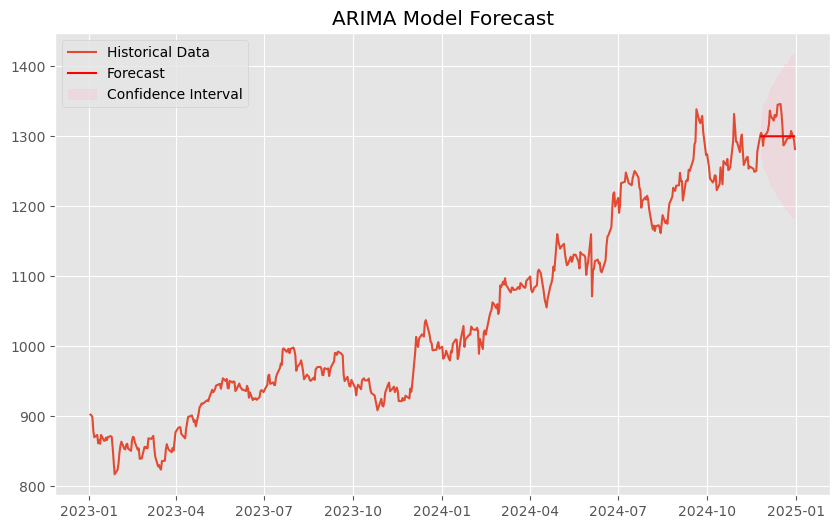

In [130]:
data=df.Close[:470]       

p, d, q =1,1,0  # Replace with values from ACF and PACF plots if needed
model = ARIMA(data, order=(p, d, q))
model_fit = model.fit()

print(model_fit.summary())

#Forecast
forecast_steps = 25  # Predict next 30 time points
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, freq="B")[1:]
forecast_series = forecast.predicted_mean
forecast_ci = forecast.conf_int()

#Plot results
plt.figure(figsize=(10, 6))
plt.plot(df.Close[:495], label="Historical Data")
plt.plot(forecast_index, forecast_series, label="Forecast", color="red")
plt.fill_between(forecast_index, 
                 forecast_ci.iloc[:, 0], 
                 forecast_ci.iloc[:, 1], 
                 color='pink', alpha=0.3, label="Confidence Interval")
plt.legend()
plt.title("ARIMA Model Forecast")
plt.show()

In [134]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 628.6/628.6 kB 8.2 MB/s eta 0:00:00a 0:00:01


In [137]:
mae = mean_absolute_error(df.Close[470:], forecast_series)
print("Mean Absolute Error:", mae)

mse = mean_squared_error(df.Close[470:], forecast_series)
rmse = np.sqrt(mse)
print("Root Mean Absolute Error:",rmse)

mape = np.mean(np.abs((np.array(forecast_series) - np.array(df.Close[470:])) / df.Close[470:])) * 100
print("Mean Absolute Percentage Error:",mape)

Mean Absolute Error: 17.0929500184008
Root Mean Absolute Error: 21.93387245736516
Mean Absolute Percentage Error: 1.291295603677275


In [138]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
order = (4, 1, 2)             
seasonal_order = (1, 1, 1, 14)  
order = (1, 1, 1)             

model = SARIMAX(data, order=order, seasonal_order=seasonal_order)
model_fit = model.fit(disp=False)

# Step 6: Model Summary
print(model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  470
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 14)   Log Likelihood               -1815.244
Date:                            Wed, 12 Mar 2025   AIC                           3640.489
Time:                                    13:53:16   BIC                           3661.090
Sample:                                         0   HQIC                          3648.605
                                            - 470                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9206      0.047     19.451      0.000       0.828       1.013
ma.L1         -0.9666      0.034   

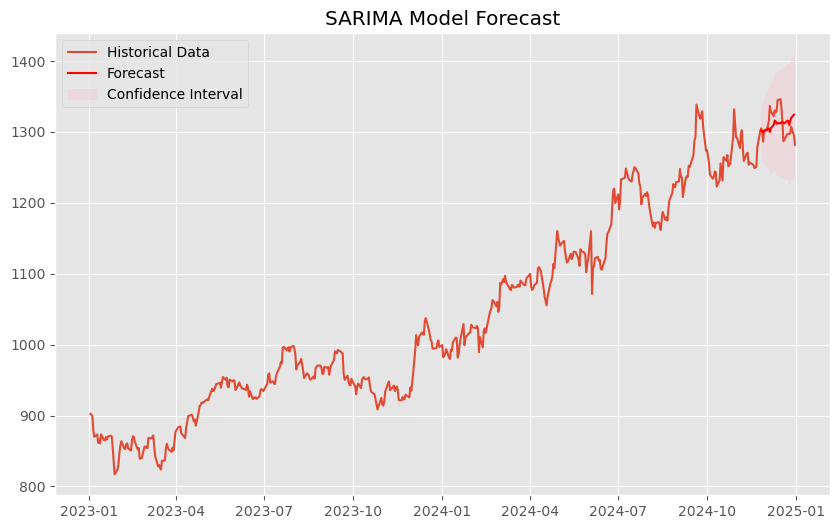

In [139]:
forecast_steps = 25  # Predict next 30 time points
forecast = model_fit.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=data.index[-1], periods=forecast_steps + 1, freq="B")[1:]
forecast_series = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Step 7: Plot results
plt.figure(figsize=(10, 6))
plt.plot(df.Close[:495], label="Historical Data")
plt.plot(forecast_index, forecast_series, label="Forecast", color="red")
plt.fill_between(forecast_index, 
                 forecast_ci.iloc[:, 0], 
                 forecast_ci.iloc[:, 1], 
                 color='pink', alpha=0.3, label="Confidence Interval")
plt.legend()
plt.title("SARIMA Model Forecast")
plt.show()

In [140]:
mae = mean_absolute_error(df.Close[470:], forecast_series)
print("Mean Absolute Error:", mae)

mse = mean_squared_error(df.Close[470:], forecast_series)
rmse = np.sqrt(mse)
print("Root Mean Absolute Error:",rmse)

mape = np.mean(np.abs((np.array(forecast_series) - np.array(df.Close[470:])) / df.Close[470:])) * 100
print("Mean Absolute Percentage Error:",mape)

Mean Absolute Error: 16.619957102959525
Root Mean Absolute Error: 20.274860714196024
Mean Absolute Percentage Error: 1.2653287743530741
